In [69]:
import numpy as np
from __future__ import division
import matplotlib.pyplot as plt


class Airfoil:
    """Model of Airfoil under Aerodynamic Flutter"""
    def __init__(self):
        
        self.runtime = .1 #how long the model will run for
        self.timestep = .00001 #Discrete timestep to run the program
        
        #constants and wing properties
        self.R = .005 #Radius of Beam Cross Section, M
        self.E = 4000000000 #Modulus of Elasticity of Beam, Pa. MDF
        self.I = 3.1415*self.R**2/4 #Moment of inertia of beam, M^4
        self.l = .8 #Length of massless beam section, Meters
        self.J = 3.1415*self.R**2/2 #Torsional constant of beam
        self.G = 2500000000 #Shear modulus of beam, PA. MDF.
        self.x_ac = .05 #distance from elastic cente to aerodynamic center,m
        self.x_gc = 0 #distance from cm of wing to aerodyanmic center, m
        self.Rho = 1.225 #density of airflow over wing, kg/m^3
        self.u = 6 #velocity of airflow over wing, m/s
        self.S = .2 #length of rigid airfoil section
        self.M_wing = 7.3 # mass of wing, Kg
        self.I_wing = .0078125 #moment of inertia of wing about elastic axis,kg*m^2
        
        #Initial values for theta and Z
        self.Theta = .005
        self.Thetadot = 0
        self.Thetadoubledot = 0
        
        self.Z = 0
        self.Zdot = 0
        self.Zdoubledot = 0
        
     
        self.run()
        
    def calculate_C_l(self):
        #if the angle of attack is greater than 15 degrees, stalled
        if np.absolute(self.Theta) > .261799:
            self.C_l = 0
        else:
            self.C_l = 2*3.141592*self.Theta
                
    def calculate_T_e(self):
        self.T_e = -(self.Theta*self.J*self.G)/self.l
            
    def calculate_F_e(self):
        self.F_e = -(3*self.Z*self.E*self.I)/self.l**3
            
    def calculate_F_l(self):
        self.F_l = .5*self.Rho*self.u**2*self.S*self.C_l
            
    def calculate_T_l(self):
        self.T_l = self.x_ac*self.F_l
        
    def run(self):

            
        #create arrays to track quantities of interest
        self.times = np.arange(0,self.runtime,self.timestep)
        self.stepcount = self.times.size
        self.thetas = np.zeros(int(self.stepcount))
        self.thetadots = np.zeros(int(self.stepcount))
        self.thetadoubledots = np.zeros(int(self.stepcount))
        self.zs = np.zeros(int(self.stepcount))
        self.zdots = np.zeros(int(self.stepcount))
        self.zdoubledots = np.zeros(int(self.stepcount))
        self.cls = np.zeros(int(self.stepcount))
        self.tes = np.zeros(int(self.stepcount))
        self.fes = np.zeros(int(self.stepcount))
        self.tls = np.zeros(int(self.stepcount))
        self.fls = np.zeros(int(self.stepcount))

            
        #track what step we are in
        self.step=0
            
        for t in self.times:
            #calculate quantities of interest
            self.calculate_C_l()
            self.calculate_T_e()
            self.calculate_F_e()
            self.calculate_F_l()
            self.calculate_T_l()
            
            #Calculate accelerations based on positions
            self.Thetadoubledot = (self.T_e + self.T_l)/self.I_wing
            self.Zdoubledot = (self.F_e + self.F_l)/self.M_wing
            
            #Write arrays
            self.thetas[self.step] = self.Theta
            self.thetadots[self.step] = self.Thetadot
            self.thetadoubledots[self.step] = self.Thetadoubledot
            self.zs[self.step] = self.Z
            self.zdots[self.step] = self.Zdot
            self.zdoubledots[self.step] = self.Zdoubledot
            self.cls[self.step] = self.C_l
            self.tes[self.step] = self.T_e
            self.fes[self.step] = self.F_e
            self.tls[self.step] = self.T_l
            self.fls[self.step] = self.F_l
            
            #update velocities
            self.Thetadot += self.Thetadoubledot*self.timestep
            self.Zdot += self.Zdoubledot*self.timestep
                
            #update positions
            self.Z += self.Zdot*self.timestep
            self.Theta += self.Thetadot*self.timestep
                
            #iterate step counter
            self.step+= 1
        
        #Plot results
        fig, ax = plt.subplots(2)
        
        plt.title("Aerodynamic Flutter - Theta and Z vs time")
        
        ax[0].plot(self.times, self.zs, 'k', label='Z')
        ax[1].plot(self.times, self.thetas ,'k', label='Theta')

        
        ax[1].set_xlabel("Time")
        
        ax[0].set_ylabel("Z")
        ax[1].set_ylabel("Theta")

        
        ax[0].axes.get_xaxis().set_visible(False)

        
        fig.set_size_inches(18.5,10.5)
        plt.show()

























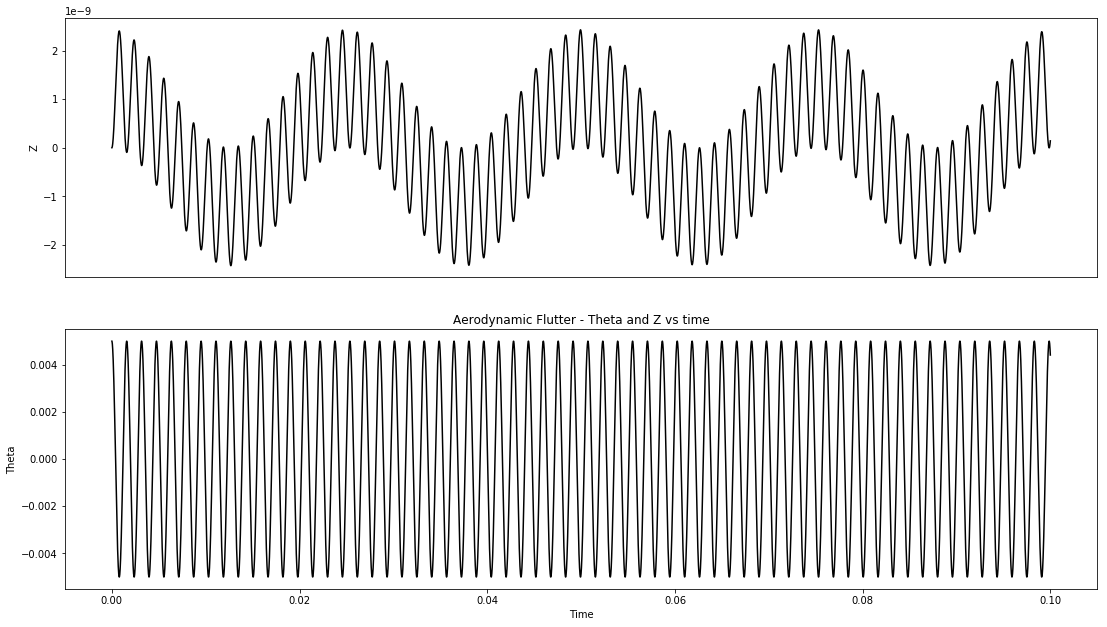

<__main__.Airfoil instance at 0x7f179765e638>

In [70]:
Airfoil()